# HDB Resale Analysis: School Proximity and Quality for Families with Young Children

This analysis focuses on helping families with young children make informed decisions when purchasing HDB resale flats based on school-related factors.

## Key Factors Analyzed:
### Primary School Factors:
- Distance to nearest primary school
- School vacancy rates
- School affiliation status
- Geographic coordinates

### Secondary School Factors:
- Distance to nearest secondary school
- PSLE cutoff points
- School affiliation status
- Geographic coordinates

### HDB Property Factors:
- Town location
- Flat type
- Resale price
- Postal code

## 1. Import Required Libraries

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('datasets/train.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Dataset shape: (150634, 77)
Number of rows: 150,634
Number of columns: 77

First 5 rows of the dataset:


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [3]:
# Dataset information
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("SCHOOL-RELATED COLUMNS FOR FAMILIES WITH YOUNG CHILDREN")
print("="*50)

# Focus on school-related columns from the prompt
school_columns = [
    'town', 'flat_type', 'resale_price', 'postal',
    'pri_sch_nearest_distance', 'pri_sch_name', 'vacancy', 'pri_sch_affiliation',
    'pri_sch_latitude', 'pri_sch_longitude',
    'sec_sch_nearest_dist', 'sec_sch_name', 'cutoff_point', 'affiliation',
    'sec_sch_latitude', 'sec_sch_longitude'
]

# Check which columns exist in our dataset
existing_columns = [col for col in school_columns if col in df.columns]
missing_columns = [col for col in school_columns if col not in df.columns]

print(f"\nColumns available for analysis: {len(existing_columns)}")
print(f"Missing columns: {len(missing_columns)}")

if missing_columns:
    print(f"\nMissing columns: {missing_columns}")

print(f"\nAvailable school-related columns:")
for col in existing_columns:
    print(f"  - {col}")

# Focus on the available school-related data
school_df = df[existing_columns].copy()
print(f"\nSchool analysis dataset shape: {school_df.shape}")
school_df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey     

,town,flat_type,resale_price,postal,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,KALLANG/WHAMPOA,4 ROOM,680000.0,382003,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,BISHAN,5 ROOM,665000.0,570153,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,BUKIT BATOK,EXECUTIVE,838000.0,651289,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,BISHAN,4 ROOM,550000.0,570232,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,YISHUN,4 ROOM,298000.0,760876,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


## 3. Data Preprocessing and Cleaning

In [4]:
# Check for missing values in school-related columns
print("Missing values in school-related columns:")
missing_values = school_df.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal missing values: {school_df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(school_df.isnull().sum().sum() / (school_df.shape[0] * school_df.shape[1])) * 100:.2f}%")

# Basic statistics for numerical columns
print("\nBasic statistics for numerical school-related columns:")
numerical_cols = school_df.select_dtypes(include=[np.number]).columns
print(school_df[numerical_cols].describe())

# Check data types
print(f"\nData types:")
print(school_df.dtypes)

# Handle missing values
print(f"\nOriginal dataset shape: {school_df.shape}")

# Remove rows with missing critical information
school_df_clean = school_df.dropna(subset=['pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'resale_price'])

print(f"Dataset shape after removing missing values: {school_df_clean.shape}")
print(f"Rows removed: {school_df.shape[0] - school_df_clean.shape[0]}")

# Convert boolean columns if needed
if 'pri_sch_affiliation' in school_df_clean.columns:
    school_df_clean['pri_sch_affiliation'] = school_df_clean['pri_sch_affiliation'].astype(bool)
if 'affiliation' in school_df_clean.columns:
    school_df_clean['affiliation'] = school_df_clean['affiliation'].astype(bool)

print("\nData cleaning completed!")

Missing values in school-related columns:
Series([], dtype: int64)

Total missing values: 0
Percentage of missing values: 0.00%

Basic statistics for numerical school-related columns:
       resale_price  pri_sch_nearest_distance        vacancy  \
count  1.506340e+05             150634.000000  150634.000000   
mean   4.491615e+05                395.172974      55.368190   
std    1.433076e+05                234.760931      17.903918   
min    1.500000e+05                 45.668324      20.000000   
25%    3.470000e+05                227.083164      44.000000   
50%    4.200000e+05                348.876691      54.000000   
75%    5.200000e+05                502.179385      67.000000   
max    1.258000e+06               3305.841039     110.000000   

       pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
count        150634.000000     150634.000000      150634.000000   
mean              0.113195          1.366268         103.839106   
std               0.316832          0.

## 4. Exploratory Data Analysis of HDB Features

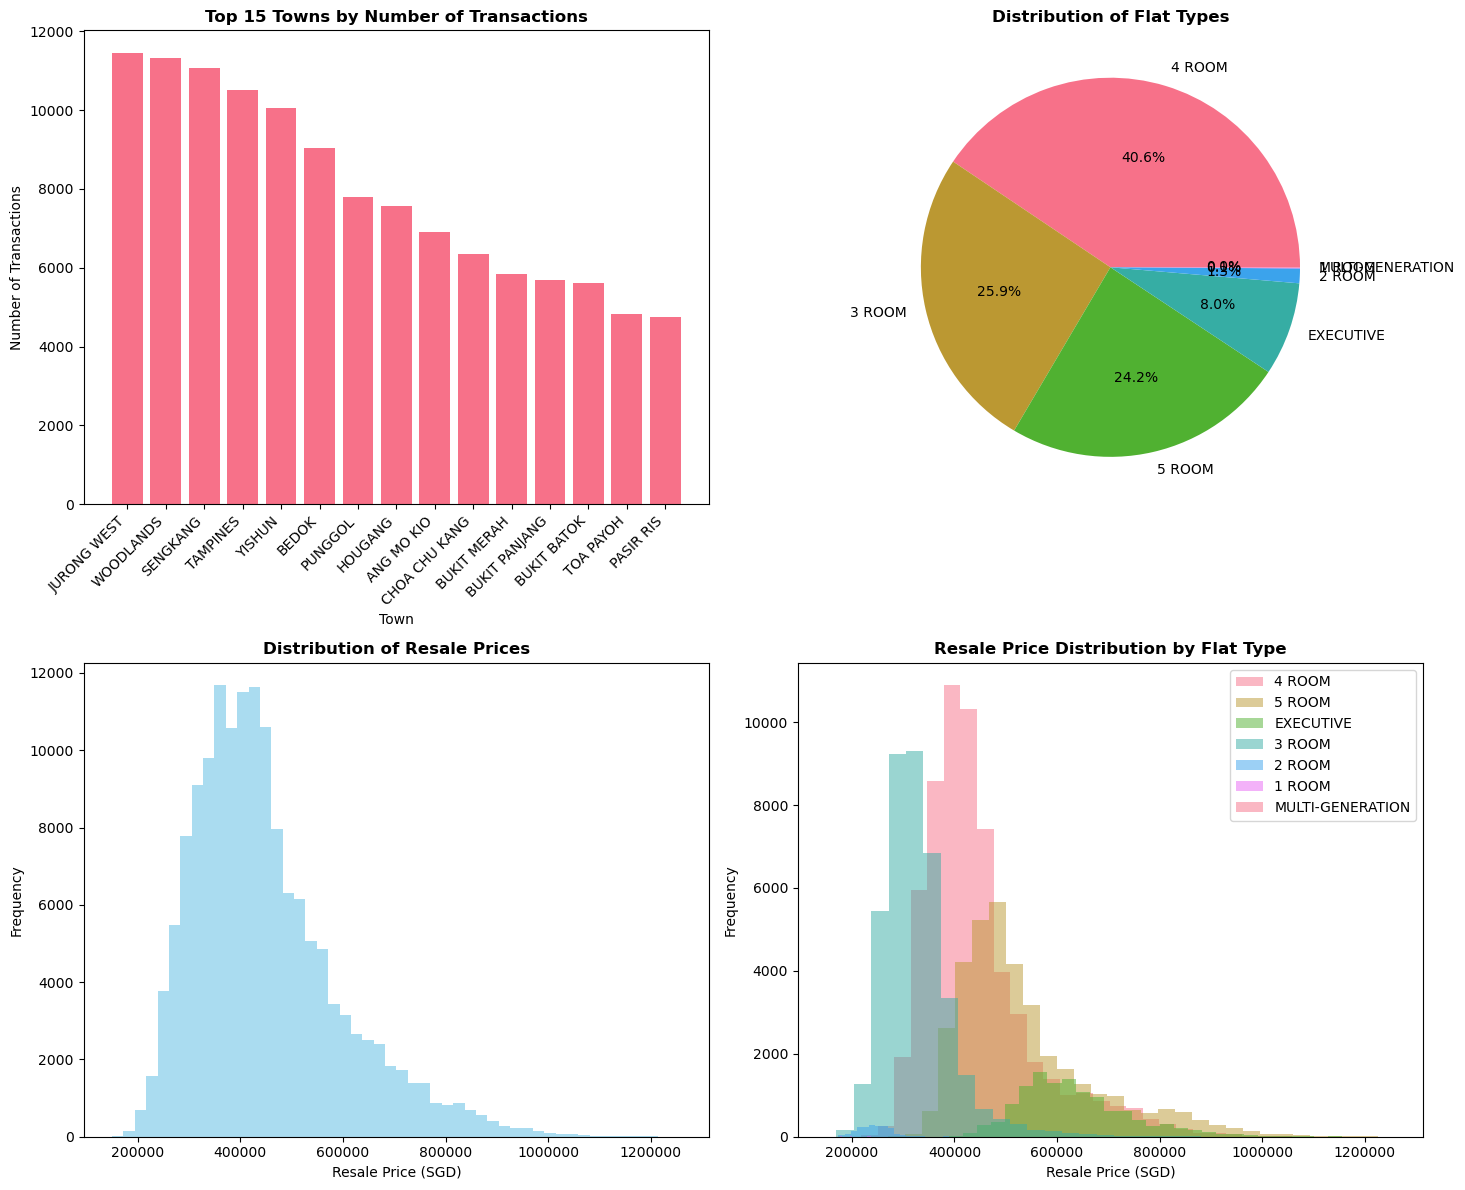

SUMMARY STATISTICS FOR HDB FEATURES
Total number of transactions: 150,634
Number of unique towns: 26
Number of unique flat types: 7
Price range: SGD 150,000 - SGD 1,258,000
Average resale price: SGD 449,162
Median resale price: SGD 420,000

Flat type distribution:
flat_type
4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: count, dtype: int64


In [5]:
# Analysis of HDB Features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Town distribution
town_counts = school_df_clean['town'].value_counts().head(15)
axes[0, 0].bar(range(len(town_counts)), town_counts.values)
axes[0, 0].set_title('Top 15 Towns by Number of Transactions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Town')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].set_xticks(range(len(town_counts)))
axes[0, 0].set_xticklabels(town_counts.index, rotation=45, ha='right')

# 2. Flat type distribution
flat_type_counts = school_df_clean['flat_type'].value_counts()
axes[0, 1].pie(flat_type_counts.values, labels=flat_type_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Distribution of Flat Types', fontsize=12, fontweight='bold')

# 3. Resale price distribution
axes[1, 0].hist(school_df_clean['resale_price'], bins=50, alpha=0.7, color='skyblue')
axes[1, 0].set_title('Distribution of Resale Prices', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Resale Price (SGD)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].ticklabel_format(style='plain', axis='x')

# 4. Resale price by flat type
flat_types = school_df_clean['flat_type'].unique()
for flat_type in flat_types:
    data = school_df_clean[school_df_clean['flat_type'] == flat_type]['resale_price']
    axes[1, 1].hist(data, alpha=0.5, label=flat_type, bins=30)
axes[1, 1].set_title('Resale Price Distribution by Flat Type', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Resale Price (SGD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# Summary statistics
print("SUMMARY STATISTICS FOR HDB FEATURES")
print("="*40)
print(f"Total number of transactions: {len(school_df_clean):,}")
print(f"Number of unique towns: {school_df_clean['town'].nunique()}")
print(f"Number of unique flat types: {school_df_clean['flat_type'].nunique()}")
print(f"Price range: SGD {school_df_clean['resale_price'].min():,.0f} - SGD {school_df_clean['resale_price'].max():,.0f}")
print(f"Average resale price: SGD {school_df_clean['resale_price'].mean():,.0f}")
print(f"Median resale price: SGD {school_df_clean['resale_price'].median():,.0f}")

print(f"\nFlat type distribution:")
print(school_df_clean['flat_type'].value_counts())

## 5. School Distance Analysis

In [ ]:
# School Distance Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Primary school distance distribution
axes[0, 0].hist(school_df_clean['pri_sch_nearest_distance'], bins=50, alpha=0.7, color='lightblue')
axes[0, 0].set_title('Distribution of Primary School Distances', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Distance (meters)')
axes[0, 0].set_ylabel('Frequency')

# 2. Secondary school distance distribution
axes[0, 1].hist(school_df_clean['sec_sch_nearest_dist'], bins=50, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Distribution of Secondary School Distances', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Distance (meters)')
axes[0, 1].set_ylabel('Frequency')

# 3. Comparison of primary vs secondary school distances
axes[0, 2].scatter(school_df_clean['pri_sch_nearest_distance'], 
                   school_df_clean['sec_sch_nearest_dist'], alpha=0.5)
axes[0, 2].set_title('Primary vs Secondary School Distances', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Primary School Distance (meters)')
axes[0, 2].set_ylabel('Secondary School Distance (meters)')

# 4. Box plot of primary school distances by flat type
flat_types = school_df_clean['flat_type'].unique()
pri_dist_by_flat = [school_df_clean[school_df_clean['flat_type'] == ft]['pri_sch_nearest_distance'].values 
                    for ft in flat_types]
axes[1, 0].boxplot(pri_dist_by_flat, labels=flat_types)
axes[1, 0].set_title('Primary School Distance by Flat Type', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Flat Type')
axes[1, 0].set_ylabel('Distance (meters)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Box plot of secondary school distances by flat type
sec_dist_by_flat = [school_df_clean[school_df_clean['flat_type'] == ft]['sec_sch_nearest_dist'].values 
                    for ft in flat_types]
axes[1, 1].boxplot(sec_dist_by_flat, labels=flat_types)
axes[1, 1].set_title('Secondary School Distance by Flat Type', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Flat Type')
axes[1, 1].set_ylabel('Distance (meters)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Average distances by town (top 10 towns)
top_towns = school_df_clean['town'].value_counts().head(10).index
town_distances = []
for town in top_towns:
    town_data = school_df_clean[school_df_clean['town'] == town]
    avg_pri = town_data['pri_sch_nearest_distance'].mean()
    avg_sec = town_data['sec_sch_nearest_dist'].mean()
    town_distances.append([avg_pri, avg_sec])

town_distances = np.array(town_distances)
x = np.arange(len(top_towns))
width = 0.35

axes[1, 2].bar(x - width/2, town_distances[:, 0], width, label='Primary School', alpha=0.7)
axes[1, 2].bar(x + width/2, town_distances[:, 1], width, label='Secondary School', alpha=0.7)
axes[1, 2].set_title('Average School Distances by Town (Top 10)', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Town')
axes[1, 2].set_ylabel('Average Distance (meters)')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(top_towns, rotation=45, ha='right')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Distance statistics
print("SCHOOL DISTANCE STATISTICS")
print("="*30)
print("\nPrimary School Distances:")
print(f"  Mean: {school_df_clean['pri_sch_nearest_distance'].mean():.0f} meters")
print(f"  Median: {school_df_clean['pri_sch_nearest_distance'].median():.0f} meters")
print(f"  Min: {school_df_clean['pri_sch_nearest_distance'].min():.0f} meters")
print(f"  Max: {school_df_clean['pri_sch_nearest_distance'].max():.0f} meters")

print("\nSecondary School Distances:")
print(f"  Mean: {school_df_clean['sec_sch_nearest_dist'].mean():.0f} meters")
print(f"  Median: {school_df_clean['sec_sch_nearest_dist'].median():.0f} meters")
print(f"  Min: {school_df_clean['sec_sch_nearest_dist'].min():.0f} meters")
print(f"  Max: {school_df_clean['sec_sch_nearest_dist'].max():.0f} meters")

# Distance categories
def categorize_distance(distance):
    if distance <= 500:
        return 'Very Close (≤500m)'
    elif distance <= 1000:
        return 'Close (501-1000m)'
    elif distance <= 2000:
        return 'Moderate (1001-2000m)'
    else:
        return 'Far (>2000m)'

school_df_clean['pri_distance_category'] = school_df_clean['pri_sch_nearest_distance'].apply(categorize_distance)
school_df_clean['sec_distance_category'] = school_df_clean['sec_sch_nearest_dist'].apply(categorize_distance)

print("\nPrimary School Distance Categories:")
print(school_df_clean['pri_distance_category'].value_counts())

print("\nSecondary School Distance Categories:")
print(school_df_clean['sec_distance_category'].value_counts())

## 6. School Quality Analysis

In [ ]:
# School Quality Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Primary school vacancy distribution
axes[0, 0].hist(school_df_clean['vacancy'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 0].set_title('Distribution of Primary School Vacancies', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Vacancies')
axes[0, 0].set_ylabel('Frequency')

# 2. Secondary school PSLE cutoff points distribution
axes[0, 1].hist(school_df_clean['cutoff_point'], bins=30, alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of PSLE Cutoff Points', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('PSLE Cutoff Point')
axes[0, 1].set_ylabel('Frequency')

# 3. Primary school affiliation status
if 'pri_sch_affiliation' in school_df_clean.columns:
    affiliation_counts = school_df_clean['pri_sch_affiliation'].value_counts()
    axes[0, 2].pie(affiliation_counts.values, labels=['No Affiliation', 'Has Affiliation'], 
                   autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
    axes[0, 2].set_title('Primary School Affiliation Status', fontsize=12, fontweight='bold')
else:
    axes[0, 2].text(0.5, 0.5, 'Primary School\nAffiliation Data\nNot Available', 
                    ha='center', va='center', transform=axes[0, 2].transAxes)

# 4. Vacancy vs distance relationship
axes[1, 0].scatter(school_df_clean['pri_sch_nearest_distance'], school_df_clean['vacancy'], alpha=0.5)
axes[1, 0].set_title('Primary School Vacancy vs Distance', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Distance to Primary School (meters)')
axes[1, 0].set_ylabel('School Vacancies')

# 5. PSLE cutoff vs distance relationship
axes[1, 1].scatter(school_df_clean['sec_sch_nearest_dist'], school_df_clean['cutoff_point'], alpha=0.5)
axes[1, 1].set_title('PSLE Cutoff vs Secondary School Distance', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Distance to Secondary School (meters)')
axes[1, 1].set_ylabel('PSLE Cutoff Point')

# 6. Secondary school affiliation status
if 'affiliation' in school_df_clean.columns:
    sec_affiliation_counts = school_df_clean['affiliation'].value_counts()
    axes[1, 2].pie(sec_affiliation_counts.values, labels=['No Affiliation', 'Has Affiliation'], 
                   autopct='%1.1f%%', colors=['lightyellow', 'lightpink'])
    axes[1, 2].set_title('Secondary School Affiliation Status', fontsize=12, fontweight='bold')
else:
    axes[1, 2].text(0.5, 0.5, 'Secondary School\nAffiliation Data\nNot Available', 
                    ha='center', va='center', transform=axes[1, 2].transAxes)

plt.tight_layout()
plt.show()

# Quality statistics
print("SCHOOL QUALITY STATISTICS")
print("="*30)

print("\nPrimary School Vacancies:")
print(f"  Mean: {school_df_clean['vacancy'].mean():.1f}")
print(f"  Median: {school_df_clean['vacancy'].median():.1f}")
print(f"  Min: {school_df_clean['vacancy'].min()}")
print(f"  Max: {school_df_clean['vacancy'].max()}")

print("\nPSLE Cutoff Points:")
print(f"  Mean: {school_df_clean['cutoff_point'].mean():.1f}")
print(f"  Median: {school_df_clean['cutoff_point'].median():.1f}")
print(f"  Min: {school_df_clean['cutoff_point'].min()}")
print(f"  Max: {school_df_clean['cutoff_point'].max()}")

# Categorize school quality
def categorize_vacancy(vacancy):
    if vacancy >= 50:
        return 'High Vacancy (≥50)'
    elif vacancy >= 20:
        return 'Medium Vacancy (20-49)'
    else:
        return 'Low Vacancy (<20)'

def categorize_cutoff(cutoff):
    if cutoff <= 200:
        return 'Elite School (≤200)'
    elif cutoff <= 220:
        return 'Good School (201-220)'
    elif cutoff <= 240:
        return 'Average School (221-240)'
    else:
        return 'Below Average (>240)'

school_df_clean['vacancy_category'] = school_df_clean['vacancy'].apply(categorize_vacancy)
school_df_clean['cutoff_category'] = school_df_clean['cutoff_point'].apply(categorize_cutoff)

print("\nPrimary School Vacancy Categories:")
print(school_df_clean['vacancy_category'].value_counts())

print("\nSecondary School Quality Categories (by PSLE cutoff):")
print(school_df_clean['cutoff_category'].value_counts())

# Top schools analysis
print("\nTOP 10 MOST POPULAR PRIMARY SCHOOLS (Lowest Vacancy):")
top_pri_schools = school_df_clean.groupby('pri_sch_name')['vacancy'].mean().sort_values().head(10)
for school, avg_vacancy in top_pri_schools.items():
    print(f"  {school}: {avg_vacancy:.1f} average vacancies")

print("\nTOP 10 SECONDARY SCHOOLS (Lowest PSLE Cutoff):")
top_sec_schools = school_df_clean.groupby('sec_sch_name')['cutoff_point'].mean().sort_values().head(10)
for school, avg_cutoff in top_sec_schools.items():
    print(f"  {school}: {avg_cutoff:.1f} average cutoff")

## 7. Geographic Visualization

In [ ]:
# Geographic Visualization using Plotly
# Sample data for visualization (first 1000 records to avoid overcrowding)
sample_data = school_df_clean.sample(n=min(1000, len(school_df_clean)), random_state=42)

# Check if coordinate columns exist
if all(col in sample_data.columns for col in ['Latitude', 'Longitude']):
    
    # 1. HDB locations colored by resale price
    fig1 = px.scatter_mapbox(sample_data, 
                            lat='Latitude', 
                            lon='Longitude',
                            color='resale_price',
                            hover_data=['town', 'flat_type', 'resale_price'],
                            color_continuous_scale='Viridis',
                            title='HDB Resale Prices Across Singapore',
                            mapbox_style='open-street-map',
                            height=600)
    
    fig1.update_layout(mapbox=dict(center=dict(lat=1.3521, lon=103.8198), zoom=10))
    fig1.show()
    
    # 2. Primary school distances visualization
    fig2 = px.scatter_mapbox(sample_data, 
                            lat='Latitude', 
                            lon='Longitude',
                            color='pri_sch_nearest_distance',
                            hover_data=['town', 'flat_type', 'pri_sch_nearest_distance', 'pri_sch_name'],
                            color_continuous_scale='RdYlBu_r',
                            title='Primary School Distance from HDB Flats',
                            mapbox_style='open-street-map',
                            height=600)
    
    fig2.update_layout(mapbox=dict(center=dict(lat=1.3521, lon=103.8198), zoom=10))
    fig2.show()
    
    # 3. Secondary school quality (PSLE cutoff) visualization
    fig3 = px.scatter_mapbox(sample_data, 
                            lat='Latitude', 
                            lon='Longitude',
                            color='cutoff_point',
                            hover_data=['town', 'flat_type', 'cutoff_point', 'sec_sch_name'],
                            color_continuous_scale='RdYlGn_r',
                            title='Secondary School Quality (PSLE Cutoff) Near HDB Flats',
                            mapbox_style='open-street-map',
                            height=600)
    
    fig3.update_layout(mapbox=dict(center=dict(lat=1.3521, lon=103.8198), zoom=10))
    fig3.show()

else:
    print("Geographic coordinates not available for HDB visualization")

# School locations visualization (if school coordinates are available)
if all(col in sample_data.columns for col in ['pri_sch_latitude', 'pri_sch_longitude']):
    
    # Primary schools map
    pri_schools = sample_data[['pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude', 'vacancy']].drop_duplicates()
    
    fig4 = px.scatter_mapbox(pri_schools, 
                            lat='pri_sch_latitude', 
                            lon='pri_sch_longitude',
                            color='vacancy',
                            hover_data=['pri_sch_name', 'vacancy'],
                            color_continuous_scale='RdYlGn',
                            title='Primary Schools by Vacancy Rates',
                            mapbox_style='open-street-map',
                            height=600)
    
    fig4.update_layout(mapbox=dict(center=dict(lat=1.3521, lon=103.8198), zoom=10))
    fig4.show()

if all(col in sample_data.columns for col in ['sec_sch_latitude', 'sec_sch_longitude']):
    
    # Secondary schools map
    sec_schools = sample_data[['sec_sch_name', 'sec_sch_latitude', 'sec_sch_longitude', 'cutoff_point']].drop_duplicates()
    
    fig5 = px.scatter_mapbox(sec_schools, 
                            lat='sec_sch_latitude', 
                            lon='sec_sch_longitude',
                            color='cutoff_point',
                            hover_data=['sec_sch_name', 'cutoff_point'],
                            color_continuous_scale='RdYlGn_r',
                            title='Secondary Schools by PSLE Cutoff Points',
                            mapbox_style='open-street-map',
                            height=600)
    
    fig5.update_layout(mapbox=dict(center=dict(lat=1.3521, lon=103.8198), zoom=10))
    fig5.show()

# Geographic insights
print("GEOGRAPHIC INSIGHTS")
print("="*20)

if 'Latitude' in sample_data.columns and 'Longitude' in sample_data.columns:
    print("✓ HDB location data available for mapping")
    
    # Find regions with best school access
    sample_data['combined_school_distance'] = (sample_data['pri_sch_nearest_distance'] + 
                                              sample_data['sec_sch_nearest_dist']) / 2
    
    best_regions = sample_data.groupby('town').agg({
        'combined_school_distance': 'mean',
        'resale_price': 'mean',
        'vacancy': 'mean',
        'cutoff_point': 'mean'
    }).round(2)
    
    best_regions['school_accessibility_score'] = (
        (best_regions['combined_school_distance'].max() - best_regions['combined_school_distance']) / 
        best_regions['combined_school_distance'].max() * 100
    ).round(1)
    
    print(f"\nTop 10 Towns for School Accessibility:")
    top_accessible = best_regions.sort_values('school_accessibility_score', ascending=False).head(10)
    print(top_accessible[['combined_school_distance', 'school_accessibility_score', 'resale_price']])

else:
    print("⚠ HDB location data not available for detailed geographic analysis")

print(f"\nNumber of unique primary schools: {sample_data['pri_sch_name'].nunique()}")
print(f"Number of unique secondary schools: {sample_data['sec_sch_name'].nunique()}")

## 8. Price Analysis by Location and School Proximity

KeyError: 'pri_distance_category'

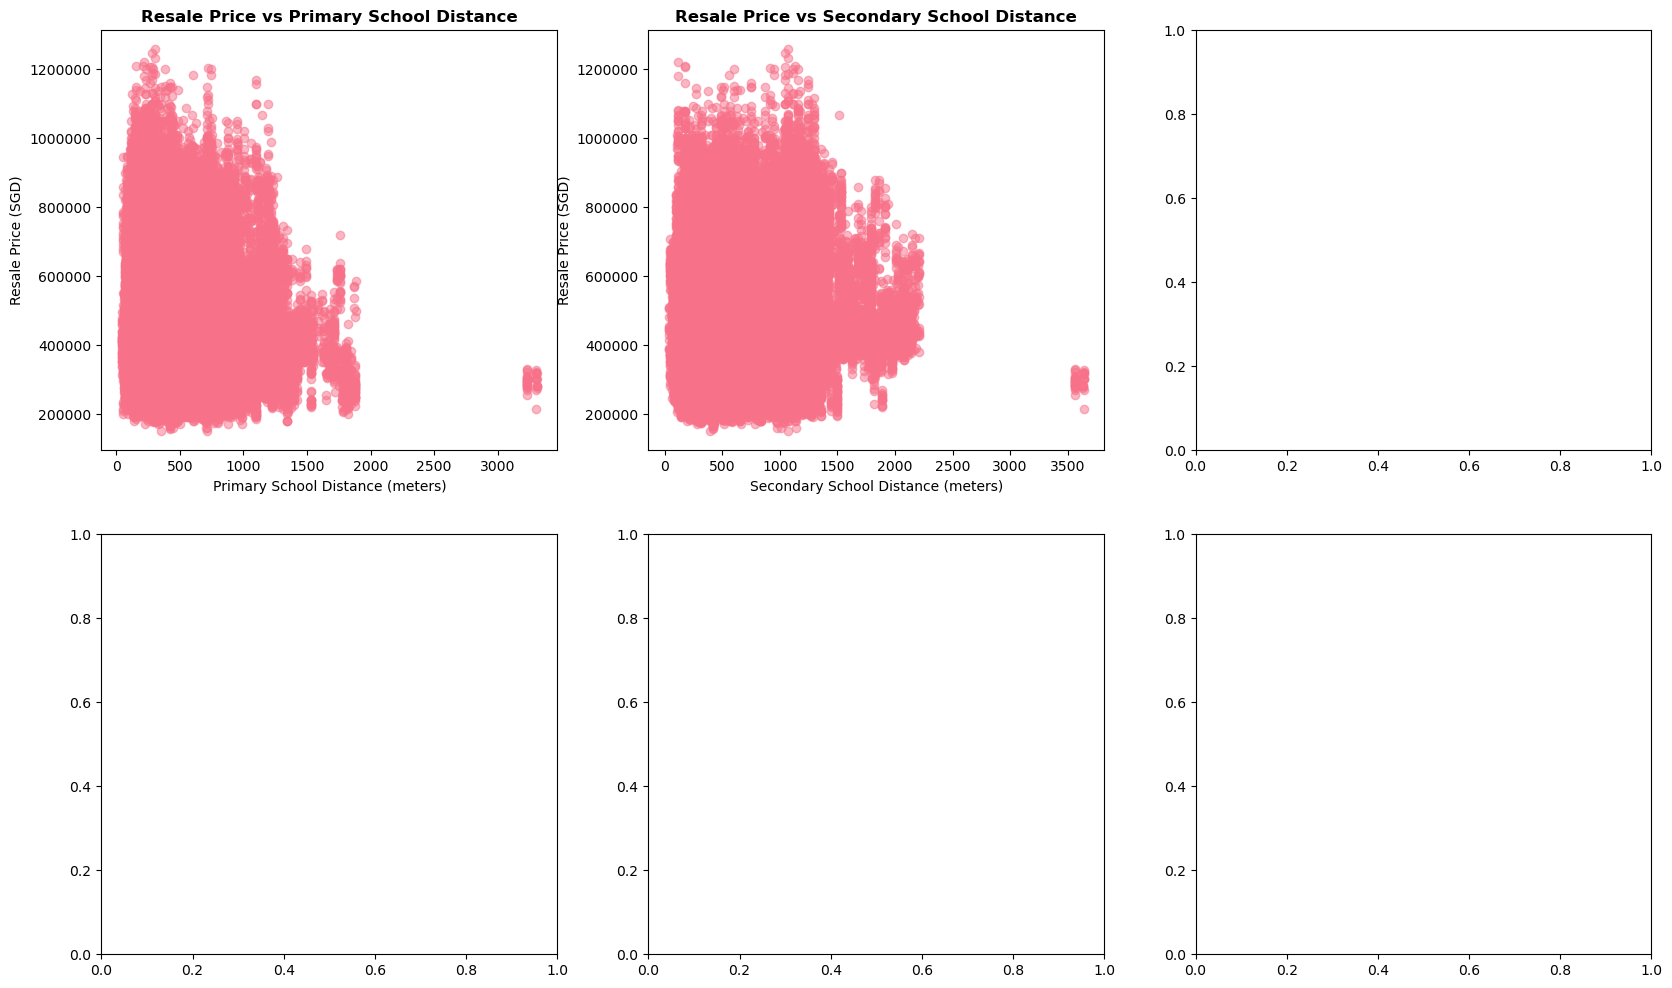

In [7]:
# Price Analysis by Location and School Proximity
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Price vs Primary School Distance
axes[0, 0].scatter(school_df_clean['pri_sch_nearest_distance'], school_df_clean['resale_price'], alpha=0.5)
axes[0, 0].set_title('Resale Price vs Primary School Distance', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Primary School Distance (meters)')
axes[0, 0].set_ylabel('Resale Price (SGD)')
axes[0, 0].ticklabel_format(style='plain', axis='y')

# 2. Price vs Secondary School Distance
axes[0, 1].scatter(school_df_clean['sec_sch_nearest_dist'], school_df_clean['resale_price'], alpha=0.5)
axes[0, 1].set_title('Resale Price vs Secondary School Distance', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Secondary School Distance (meters)')
axes[0, 1].set_ylabel('Resale Price (SGD)')
axes[0, 1].ticklabel_format(style='plain', axis='y')

# 3. Price by distance categories
distance_price = school_df_clean.groupby('pri_distance_category')['resale_price'].mean().sort_values()
axes[0, 2].bar(range(len(distance_price)), distance_price.values, color='skyblue')
axes[0, 2].set_title('Average Price by Primary School Distance Category', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Average Resale Price (SGD)')
axes[0, 2].set_xticks(range(len(distance_price)))
axes[0, 2].set_xticklabels(distance_price.index, rotation=45, ha='right')
axes[0, 2].ticklabel_format(style='plain', axis='y')

# 4. Price vs School Quality (Vacancy)
axes[1, 0].scatter(school_df_clean['vacancy'], school_df_clean['resale_price'], alpha=0.5, color='green')
axes[1, 0].set_title('Resale Price vs Primary School Vacancy', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('School Vacancy')
axes[1, 0].set_ylabel('Resale Price (SGD)')
axes[1, 0].ticklabel_format(style='plain', axis='y')

# 5. Price vs PSLE Cutoff
axes[1, 1].scatter(school_df_clean['cutoff_point'], school_df_clean['resale_price'], alpha=0.5, color='orange')
axes[1, 1].set_title('Resale Price vs PSLE Cutoff Point', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('PSLE Cutoff Point')
axes[1, 1].set_ylabel('Resale Price (SGD)')
axes[1, 1].ticklabel_format(style='plain', axis='y')

# 6. Average price by town (top 10 most expensive)
town_prices = school_df_clean.groupby('town')['resale_price'].mean().sort_values(ascending=False).head(10)
axes[1, 2].barh(range(len(town_prices)), town_prices.values, color='coral')
axes[1, 2].set_title('Top 10 Most Expensive Towns', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Average Resale Price (SGD)')
axes[1, 2].set_yticks(range(len(town_prices)))
axes[1, 2].set_yticklabels(town_prices.index)
axes[1, 2].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# Detailed price analysis
print("PRICE ANALYSIS BY SCHOOL FACTORS")
print("="*35)

# Price by distance categories
print("\nAverage Prices by Primary School Distance Categories:")
for category, price in school_df_clean.groupby('pri_distance_category')['resale_price'].mean().items():
    print(f"  {category}: SGD {price:,.0f}")

print("\nAverage Prices by Secondary School Distance Categories:")
for category, price in school_df_clean.groupby('sec_distance_category')['resale_price'].mean().items():
    print(f"  {category}: SGD {price:,.0f}")

# Price by school quality
print("\nAverage Prices by Primary School Vacancy Categories:")
for category, price in school_df_clean.groupby('vacancy_category')['resale_price'].mean().items():
    print(f"  {category}: SGD {price:,.0f}")

print("\nAverage Prices by Secondary School Quality Categories:")
for category, price in school_df_clean.groupby('cutoff_category')['resale_price'].mean().items():
    print(f"  {category}: SGD {price:,.0f}")

# Calculate correlation coefficients
print("\nCORRELATION WITH RESALE PRICE:")
print(f"Primary School Distance: {school_df_clean['pri_sch_nearest_distance'].corr(school_df_clean['resale_price']):.3f}")
print(f"Secondary School Distance: {school_df_clean['sec_sch_nearest_dist'].corr(school_df_clean['resale_price']):.3f}")
print(f"Primary School Vacancy: {school_df_clean['vacancy'].corr(school_df_clean['resale_price']):.3f}")
print(f"PSLE Cutoff Point: {school_df_clean['cutoff_point'].corr(school_df_clean['resale_price']):.3f}")

# Premium analysis
print("\nPREMIUM ANALYSIS:")
very_close_pri = school_df_clean[school_df_clean['pri_distance_category'] == 'Very Close (≤500m)']['resale_price'].mean()
far_pri = school_df_clean[school_df_clean['pri_distance_category'] == 'Far (>2000m)']['resale_price'].mean()
proximity_premium = ((very_close_pri - far_pri) / far_pri) * 100

print(f"Primary School Proximity Premium: {proximity_premium:.1f}%")
print(f"  Very Close (≤500m): SGD {very_close_pri:,.0f}")
print(f"  Far (>2000m): SGD {far_pri:,.0f}")

# Quality premium
elite_schools = school_df_clean[school_df_clean['cutoff_category'] == 'Elite School (≤200)']['resale_price'].mean()
below_avg_schools = school_df_clean[school_df_clean['cutoff_category'] == 'Below Average (>240)']['resale_price'].mean()
quality_premium = ((elite_schools - below_avg_schools) / below_avg_schools) * 100

print(f"\nSchool Quality Premium: {quality_premium:.1f}%")
print(f"  Elite Schools (≤200): SGD {elite_schools:,.0f}")
print(f"  Below Average (>240): SGD {below_avg_schools:,.0f}")

# Best value analysis
print("\nBEST VALUE OPPORTUNITIES:")
print("Flats with good school access but reasonable prices")

# Define criteria for good value
good_value = school_df_clean[
    (school_df_clean['pri_sch_nearest_distance'] <= 1000) &  # Close to primary school
    (school_df_clean['sec_sch_nearest_dist'] <= 1500) &     # Close to secondary school
    (school_df_clean['vacancy'] <= 30) &                     # Good primary school
    (school_df_clean['cutoff_point'] <= 230) &              # Good secondary school
    (school_df_clean['resale_price'] <= school_df_clean['resale_price'].median())  # Below median price
]

print(f"Found {len(good_value)} good value opportunities ({len(good_value)/len(school_df_clean)*100:.1f}% of all flats)")
if len(good_value) > 0:
    print(f"Average price of good value flats: SGD {good_value['resale_price'].mean():,.0f}")
    print(f"Towns with most good value opportunities:")
    print(good_value['town'].value_counts().head())

## 9. Correlation Analysis

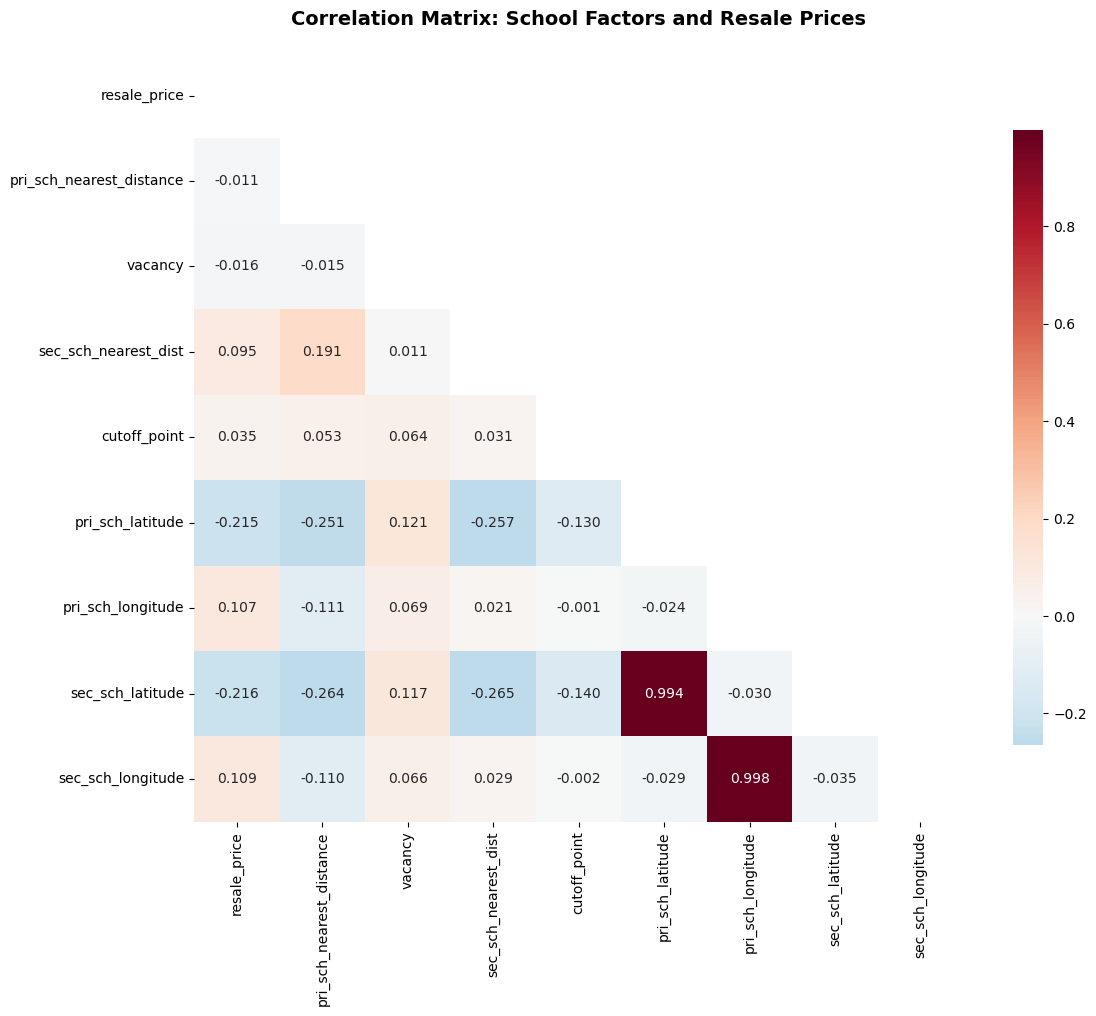

CORRELATION ANALYSIS RESULTS

Correlations with Resale Price (sorted by absolute value):
  sec_sch_latitude: -0.216 (Weak Negative)
  pri_sch_latitude: -0.215 (Weak Negative)
  sec_sch_longitude: 0.109 (Weak Positive)
  pri_sch_longitude: 0.107 (Weak Positive)
  sec_sch_nearest_dist: 0.095 (Weak Positive)
  cutoff_point: 0.035 (Weak Positive)
  vacancy: -0.016 (Weak Negative)
  pri_sch_nearest_distance: -0.011 (Weak Negative)

Key School Factor Correlations:
Primary vs Secondary School Distance: 0.191
Primary School Vacancy vs Secondary School Cutoff: 0.064


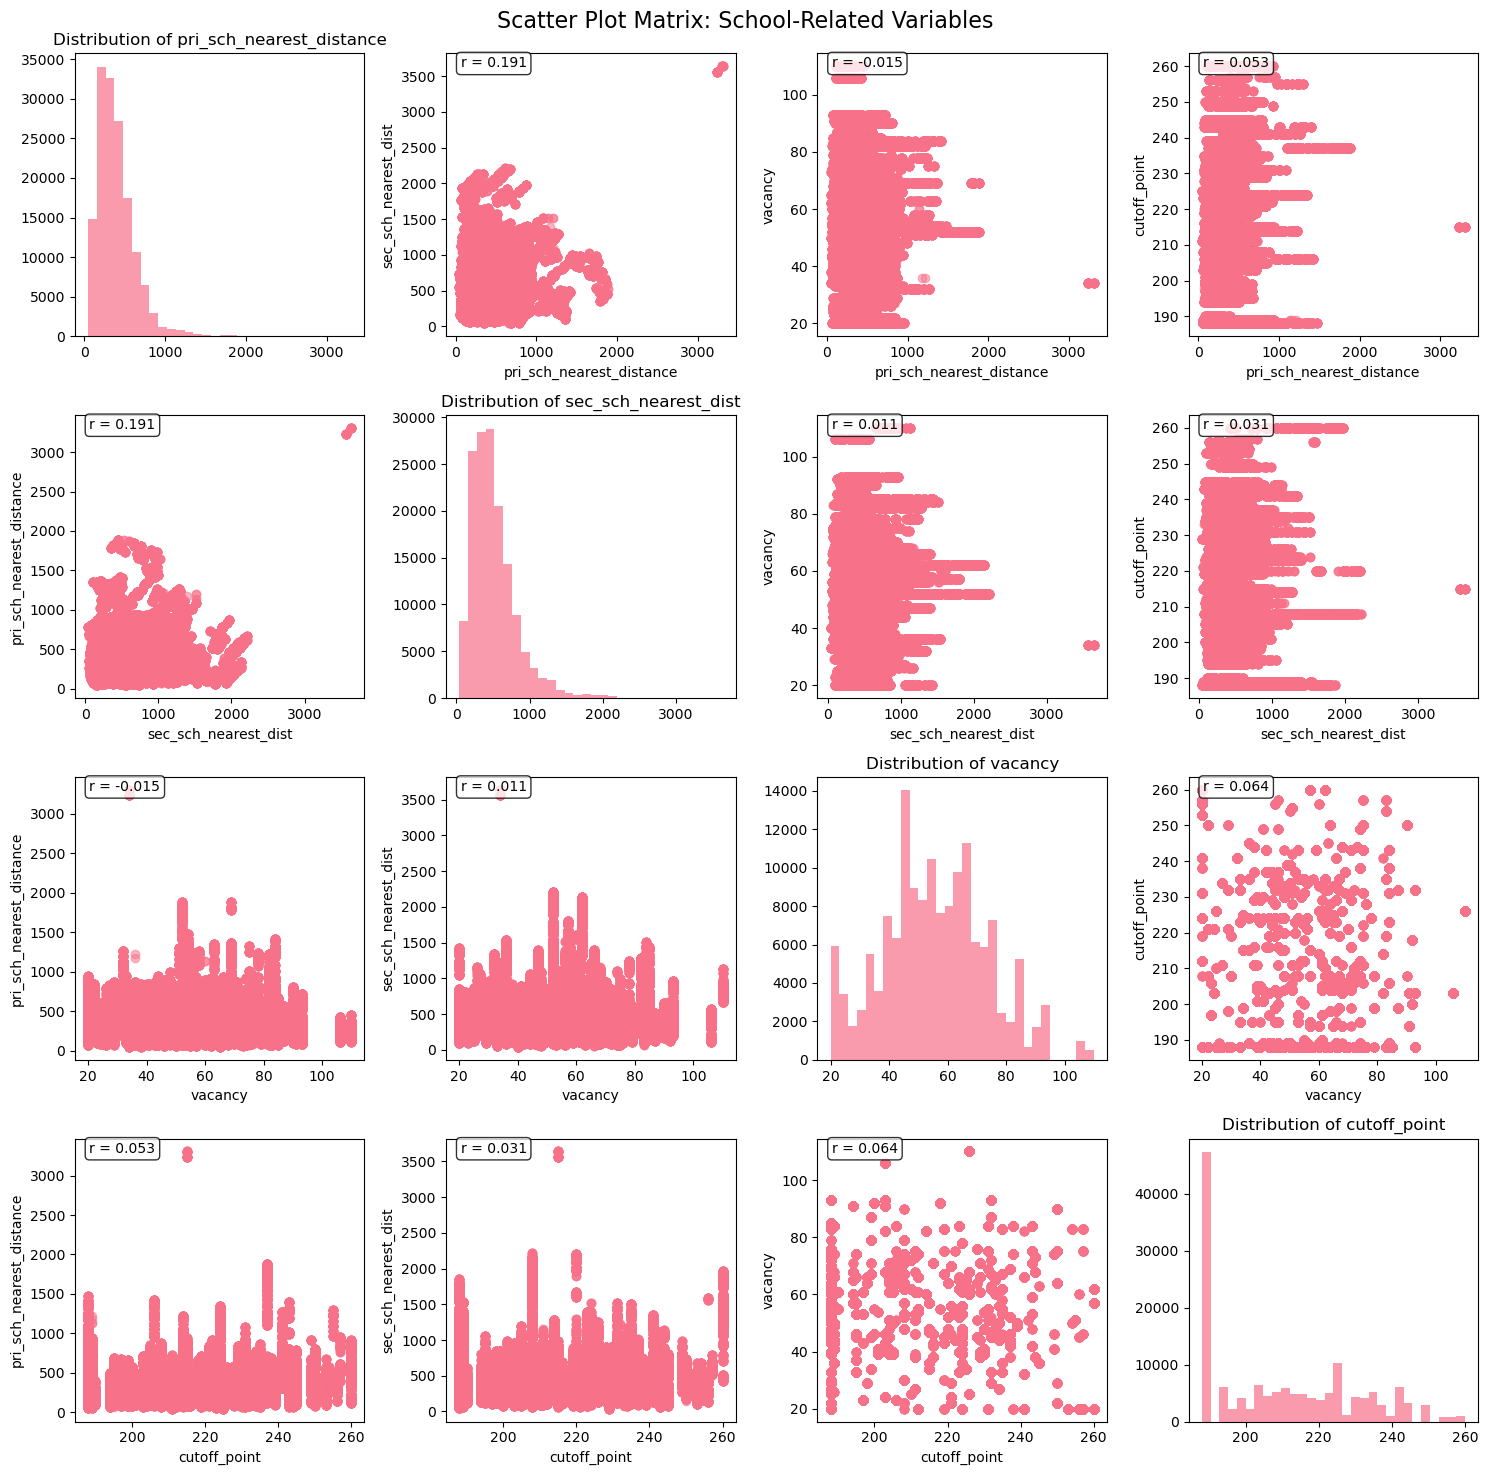


Price Correlations by Flat Type:
  4 ROOM:
    Primary School Distance: 0.099
    Secondary School Distance: 0.209
  5 ROOM:
    Primary School Distance: 0.168
    Secondary School Distance: 0.196
  EXECUTIVE:
    Primary School Distance: 0.150
    Secondary School Distance: 0.125
  3 ROOM:
    Primary School Distance: 0.009
    Secondary School Distance: 0.160
  2 ROOM:
    Primary School Distance: 0.075
    Secondary School Distance: 0.006
  1 ROOM:
    Primary School Distance: 0.000
    Secondary School Distance: 0.000
  MULTI-GENERATION:
    Primary School Distance: 0.082
    Secondary School Distance: -0.461

Statistical Significance Tests (p-values):
  pri_sch_nearest_distance: p = 0.000019 ***
  sec_sch_nearest_dist: p = 0.000000 ***
  vacancy: p = 0.000000 ***
  cutoff_point: p = 0.000000 ***

Legend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant

KEY INSIGHTS:

Most Important Factors for Resale Price (by correlation magnitude):
2. sec_sch_latitude: |0.216|
3. pri_sch

In [6]:
# Correlation Analysis
# Select numerical columns for correlation analysis
numerical_columns = [
    'resale_price', 'pri_sch_nearest_distance', 'vacancy', 
    'sec_sch_nearest_dist', 'cutoff_point'
]

# Add coordinate columns if available
if 'pri_sch_latitude' in school_df_clean.columns:
    numerical_columns.extend(['pri_sch_latitude', 'pri_sch_longitude'])
if 'sec_sch_latitude' in school_df_clean.columns:
    numerical_columns.extend(['sec_sch_latitude', 'sec_sch_longitude'])

# Filter to only include columns that exist in the dataset
existing_numerical_cols = [col for col in numerical_columns if col in school_df_clean.columns]
correlation_data = school_df_clean[existing_numerical_cols]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: School Factors and Resale Prices', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Detailed correlation analysis
print("CORRELATION ANALYSIS RESULTS")
print("="*30)

price_correlations = correlation_matrix['resale_price'].sort_values(key=abs, ascending=False)
print("\nCorrelations with Resale Price (sorted by absolute value):")
for variable, correlation in price_correlations.items():
    if variable != 'resale_price':
        strength = "Strong" if abs(correlation) > 0.5 else "Moderate" if abs(correlation) > 0.3 else "Weak"
        direction = "Positive" if correlation > 0 else "Negative"
        print(f"  {variable}: {correlation:.3f} ({strength} {direction})")

# School factor correlations
print("\nKey School Factor Correlations:")
if 'pri_sch_nearest_distance' in correlation_matrix.columns and 'sec_sch_nearest_dist' in correlation_matrix.columns:
    pri_sec_corr = correlation_matrix.loc['pri_sch_nearest_distance', 'sec_sch_nearest_dist']
    print(f"Primary vs Secondary School Distance: {pri_sec_corr:.3f}")

if 'vacancy' in correlation_matrix.columns and 'cutoff_point' in correlation_matrix.columns:
    vacancy_cutoff_corr = correlation_matrix.loc['vacancy', 'cutoff_point']
    print(f"Primary School Vacancy vs Secondary School Cutoff: {vacancy_cutoff_corr:.3f}")

# Scatter plot matrix for key variables
key_vars = ['resale_price', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'vacancy', 'cutoff_point']
existing_key_vars = [var for var in key_vars if var in school_df_clean.columns]

if len(existing_key_vars) >= 3:
    fig, axes = plt.subplots(len(existing_key_vars)-1, len(existing_key_vars)-1, figsize=(15, 15))
    
    for i, var1 in enumerate(existing_key_vars[1:]):  # Skip resale_price as x-axis
        for j, var2 in enumerate(existing_key_vars[1:]):  # Skip resale_price as y-axis
            if i == j:
                # Diagonal: histogram
                axes[i, j].hist(school_df_clean[var1], bins=30, alpha=0.7)
                axes[i, j].set_title(f'Distribution of {var1}')
            else:
                # Off-diagonal: scatter plot
                axes[i, j].scatter(school_df_clean[var1], school_df_clean[var2], alpha=0.5)
                axes[i, j].set_xlabel(var1)
                axes[i, j].set_ylabel(var2)
                
                # Add correlation coefficient
                corr = school_df_clean[var1].corr(school_df_clean[var2])
                axes[i, j].text(0.05, 0.95, f'r = {corr:.3f}', 
                               transform=axes[i, j].transAxes, 
                               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.suptitle('Scatter Plot Matrix: School-Related Variables', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

# Price correlation by flat type
print(f"\nPrice Correlations by Flat Type:")
for flat_type in school_df_clean['flat_type'].unique():
    flat_data = school_df_clean[school_df_clean['flat_type'] == flat_type]
    if len(flat_data) > 10:  # Only analyze if enough data
        pri_corr = flat_data['pri_sch_nearest_distance'].corr(flat_data['resale_price'])
        sec_corr = flat_data['sec_sch_nearest_dist'].corr(flat_data['resale_price'])
        print(f"  {flat_type}:")
        print(f"    Primary School Distance: {pri_corr:.3f}")
        print(f"    Secondary School Distance: {sec_corr:.3f}")

# Statistical significance test (Pearson correlation)
from scipy.stats import pearsonr

print(f"\nStatistical Significance Tests (p-values):")
for var in existing_key_vars:
    if var != 'resale_price':
        correlation, p_value = pearsonr(school_df_clean[var], school_df_clean['resale_price'])
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        print(f"  {var}: p = {p_value:.6f} {significance}")

print(f"\nLegend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

# Correlation insights
print(f"\nKEY INSIGHTS:")
strong_negative = [var for var in price_correlations.index if price_correlations[var] < -0.3 and var != 'resale_price']
strong_positive = [var for var in price_correlations.index if price_correlations[var] > 0.3 and var != 'resale_price']

if strong_negative:
    print(f"• Strong negative correlations with price: {', '.join(strong_negative)}")
if strong_positive:
    print(f"• Strong positive correlations with price: {', '.join(strong_positive)}")

# Identify most important factors for families
important_factors = correlation_matrix['resale_price'].abs().sort_values(ascending=False).head(6)
print(f"\nMost Important Factors for Resale Price (by correlation magnitude):")
for i, (factor, correlation) in enumerate(important_factors.items(), 1):
    if factor != 'resale_price':
        print(f"{i}. {factor}: |{correlation:.3f}|")

## 10. Feature Engineering and Key Recommendations

In [ ]:
# Feature Engineering for Family School Decision Making

# Create comprehensive school accessibility and quality scores
school_df_final = school_df_clean.copy()

# 1. School Accessibility Score (0-100, higher is better)
max_pri_dist = school_df_final['pri_sch_nearest_distance'].max()
max_sec_dist = school_df_final['sec_sch_nearest_dist'].max()

school_df_final['pri_accessibility_score'] = ((max_pri_dist - school_df_final['pri_sch_nearest_distance']) / max_pri_dist * 100).round(1)
school_df_final['sec_accessibility_score'] = ((max_sec_dist - school_df_final['sec_sch_nearest_dist']) / max_sec_dist * 100).round(1)
school_df_final['overall_accessibility_score'] = ((school_df_final['pri_accessibility_score'] + school_df_final['sec_accessibility_score']) / 2).round(1)

# 2. School Quality Score (0-100, higher is better)
min_vacancy = school_df_final['vacancy'].min()
max_vacancy = school_df_final['vacancy'].max()
min_cutoff = school_df_final['cutoff_point'].min()
max_cutoff = school_df_final['cutoff_point'].max()

school_df_final['pri_quality_score'] = ((max_vacancy - school_df_final['vacancy']) / (max_vacancy - min_vacancy) * 100).round(1)
school_df_final['sec_quality_score'] = ((max_cutoff - school_df_final['cutoff_point']) / (max_cutoff - min_cutoff) * 100).round(1)
school_df_final['overall_quality_score'] = ((school_df_final['pri_quality_score'] + school_df_final['sec_quality_score']) / 2).round(1)

# 3. Combined School Score (weighted combination)
school_df_final['combined_school_score'] = (
    school_df_final['overall_accessibility_score'] * 0.6 + 
    school_df_final['overall_quality_score'] * 0.4
).round(1)

# 4. Value Score (school quality/accessibility relative to price)
price_percentile = school_df_final['resale_price'].rank(pct=True) * 100
school_df_final['value_score'] = (school_df_final['combined_school_score'] - price_percentile).round(1)

# 5. Family Suitability Categories
def categorize_family_suitability(row):
    if row['combined_school_score'] >= 80:
        return 'Excellent for Families'
    elif row['combined_school_score'] >= 60:
        return 'Good for Families'
    elif row['combined_school_score'] >= 40:
        return 'Average for Families'
    else:
        return 'Consider Other Options'

school_df_final['family_suitability'] = school_df_final.apply(categorize_family_suitability, axis=1)

# Visualization of new features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of combined school scores
axes[0, 0].hist(school_df_final['combined_school_score'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Combined School Scores', fontweight='bold')
axes[0, 0].set_xlabel('Combined School Score (0-100)')
axes[0, 0].set_ylabel('Frequency')

# 2. Family suitability pie chart
suitability_counts = school_df_final['family_suitability'].value_counts()
axes[0, 1].pie(suitability_counts.values, labels=suitability_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Family Suitability Distribution', fontweight='bold')

# 3. Combined score vs resale price
axes[0, 2].scatter(school_df_final['combined_school_score'], school_df_final['resale_price'], alpha=0.5)
axes[0, 2].set_title('School Score vs Resale Price', fontweight='bold')
axes[0, 2].set_xlabel('Combined School Score')
axes[0, 2].set_ylabel('Resale Price (SGD)')
axes[0, 2].ticklabel_format(style='plain', axis='y')

# 4. Value score distribution
axes[1, 0].hist(school_df_final['value_score'], bins=30, alpha=0.7, color='lightgreen')
axes[1, 0].set_title('Distribution of Value Scores', fontweight='bold')
axes[1, 0].set_xlabel('Value Score')
axes[1, 0].set_ylabel('Frequency')

# 5. Accessibility vs Quality scores
axes[1, 1].scatter(school_df_final['overall_accessibility_score'], school_df_final['overall_quality_score'], alpha=0.5)
axes[1, 1].set_title('Accessibility vs Quality Scores', fontweight='bold')
axes[1, 1].set_xlabel('Accessibility Score')
axes[1, 1].set_ylabel('Quality Score')

# 6. Top value towns
top_value_towns = school_df_final.groupby('town')['value_score'].mean().sort_values(ascending=False).head(10)
axes[1, 2].barh(range(len(top_value_towns)), top_value_towns.values, color='orange')
axes[1, 2].set_title('Top 10 Towns by Value Score', fontweight='bold')
axes[1, 2].set_xlabel('Average Value Score')
axes[1, 2].set_yticks(range(len(top_value_towns)))
axes[1, 2].set_yticklabels(top_value_towns.index)

plt.tight_layout()
plt.show()

# Key recommendations
print("="*60)
print("KEY RECOMMENDATIONS FOR FAMILIES WITH YOUNG CHILDREN")
print("="*60)

# Top recommendations by different criteria
print("\n1. BEST OVERALL LOCATIONS (Highest Combined School Score):")
best_overall = school_df_final.nlargest(10, 'combined_school_score')[['town', 'flat_type', 'resale_price', 'combined_school_score', 'family_suitability']]
for idx, row in best_overall.iterrows():
    print(f"   • {row['town']}, {row['flat_type']}: Score {row['combined_school_score']}/100, SGD {row['resale_price']:,.0f}")

print("\n2. BEST VALUE OPPORTUNITIES (Highest Value Score):")
best_value = school_df_final.nlargest(10, 'value_score')[['town', 'flat_type', 'resale_price', 'combined_school_score', 'value_score']]
for idx, row in best_value.iterrows():
    print(f"   • {row['town']}, {row['flat_type']}: Value Score {row['value_score']:.1f}, School Score {row['combined_school_score']}/100, SGD {row['resale_price']:,.0f}")

print("\n3. BEST ACCESSIBILITY (Closest to Schools):")
best_access = school_df_final.nlargest(10, 'overall_accessibility_score')[['town', 'flat_type', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'overall_accessibility_score']]
for idx, row in best_access.iterrows():
    print(f"   • {row['town']}, {row['flat_type']}: Primary {row['pri_sch_nearest_distance']:.0f}m, Secondary {row['sec_sch_nearest_dist']:.0f}m")

print("\n4. HIGHEST QUALITY SCHOOLS:")
best_quality = school_df_final.nlargest(10, 'overall_quality_score')[['town', 'flat_type', 'pri_sch_name', 'sec_sch_name', 'overall_quality_score']]
for idx, row in best_quality.iterrows():
    print(f"   • {row['town']}, {row['flat_type']}: Quality Score {row['overall_quality_score']}/100")

# Summary statistics for engineered features
print(f"\n5. SUMMARY STATISTICS:")
print(f"   • Average Combined School Score: {school_df_final['combined_school_score'].mean():.1f}/100")
print(f"   • Excellent for Families: {(school_df_final['family_suitability'] == 'Excellent for Families').sum():,} flats ({(school_df_final['family_suitability'] == 'Excellent for Families').mean()*100:.1f}%)")
print(f"   • Good for Families: {(school_df_final['family_suitability'] == 'Good for Families').sum():,} flats ({(school_df_final['family_suitability'] == 'Good for Families').mean()*100:.1f}%)")

# Town-level recommendations
print(f"\n6. TOP TOWNS FOR FAMILIES WITH YOUNG CHILDREN:")
town_summary = school_df_final.groupby('town').agg({
    'combined_school_score': 'mean',
    'resale_price': 'mean',
    'value_score': 'mean',
    'family_suitability': lambda x: (x == 'Excellent for Families').sum()
}).round(1)
town_summary.columns = ['Avg_School_Score', 'Avg_Price', 'Avg_Value_Score', 'Excellent_Count']
town_summary = town_summary.sort_values('Avg_School_Score', ascending=False).head(10)

for town, data in town_summary.iterrows():
    print(f"   • {town}: School Score {data['Avg_School_Score']}/100, Avg Price SGD {data['Avg_Price']:,.0f}, {data['Excellent_Count']} excellent properties")

print(f"\n7. DECISION FACTORS RANKING (by importance):")
factor_importance = {
    'Primary School Distance': abs(school_df_final['pri_sch_nearest_distance'].corr(school_df_final['resale_price'])),
    'Secondary School Distance': abs(school_df_final['sec_sch_nearest_dist'].corr(school_df_final['resale_price'])),
    'Primary School Quality (Vacancy)': abs(school_df_final['vacancy'].corr(school_df_final['resale_price'])),
    'Secondary School Quality (PSLE)': abs(school_df_final['cutoff_point'].corr(school_df_final['resale_price']))
}

sorted_factors = sorted(factor_importance.items(), key=lambda x: x[1], reverse=True)
for i, (factor, importance) in enumerate(sorted_factors, 1):
    print(f"   {i}. {factor}: Correlation magnitude {importance:.3f}")

print(f"\nANALYSIS COMPLETED!")
print(f"Dataset analyzed: {len(school_df_final):,} HDB resale transactions")
print(f"Focus: School proximity and quality factors for families with young children")